# 08_03: Visualizing distributions

In [1]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
incomes = pd.read_csv('incomes.csv').set_index(['country', 'year'])

In [4]:
incomes['log10_daily'] = np.log10(incomes.yearly / 365.25)

Text(0, 0.5, '$ / year')

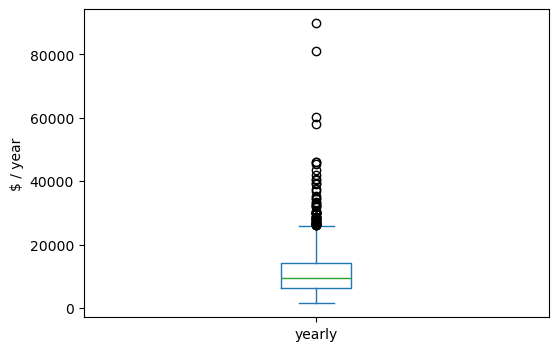

In [5]:
incomes.loc['USA', 1965].yearly.plot(kind='box', figsize=(6,4))
plt.ylabel('$ / year')

Text(0, 0.5, '$ / year')

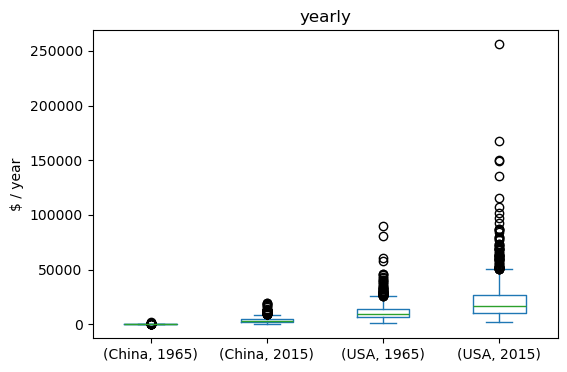

In [6]:
incomes.reset_index().plot(kind='box', column='yearly', by=['country', 'year'], figsize=(6,4))
plt.ylabel('$ / year')

Text(0, 0.5, '$\\mathrm{log}_{10} (\\$ / \\mathrm{day})$')

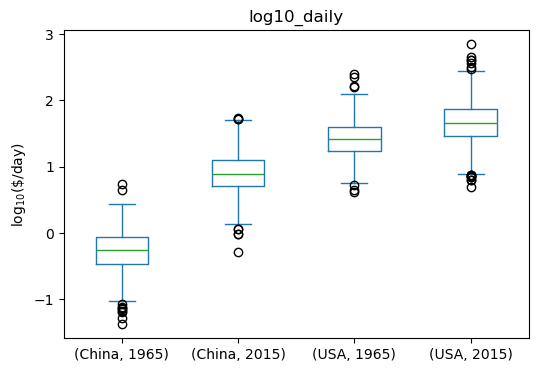

In [7]:
incomes.reset_index().plot(kind='box', column='log10_daily', by=['country', 'year'], figsize=(6,4))
plt.ylabel(r'$\mathrm{log}_{10} (\$ / \mathrm{day})$')  # labels support the LaTeX math language

Text(0.5, 0, '$\\mathrm{log}_{10} (\\$ / \\mathrm{day})$')

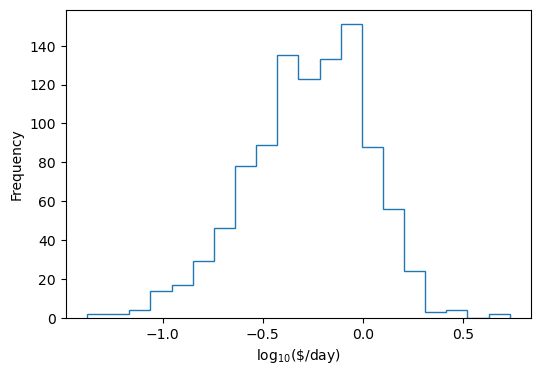

In [8]:
# histtype = 'step' removes the color fill
incomes.loc['China', 1965].log10_daily.plot(kind='hist', histtype='step', bins=20, figsize=(6,4))
plt.xlabel(r'$\mathrm{log}_{10} (\$ / \mathrm{day})$')

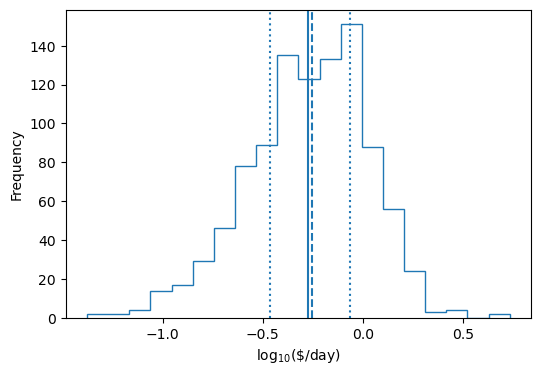

In [9]:
data = incomes.loc['China', 1965].log10_daily
data.plot(kind='hist', histtype='step', bins=20, figsize=(6,4))

plt.xlabel(r'$\mathrm{log}_{10} (\$ / \mathrm{day})$')

plt.axvline(data.mean())
plt.axvline(data.median(), linestyle='--')
plt.axvline(data.quantile(0.25), linestyle=':')
plt.axvline(data.quantile(0.75), linestyle=':')

Text(0.5, 0, '$\\mathrm{log}_{10} (\\$ / \\mathrm{day})$')

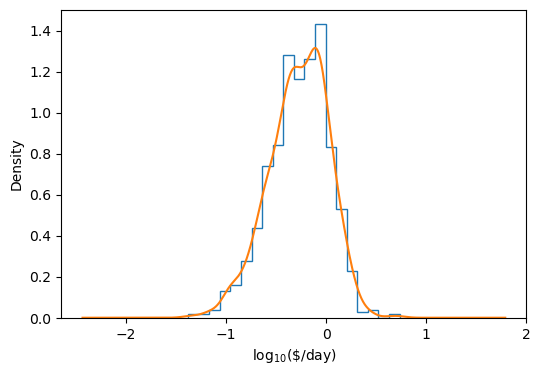

In [10]:
data.plot.hist(histtype='step', bins=20, density=True, figsize=(6,4))
data.plot.density() # set scale with bw_method = ...
plt.xlabel(r'$\mathrm{log}_{10} (\$ / \mathrm{day})$')

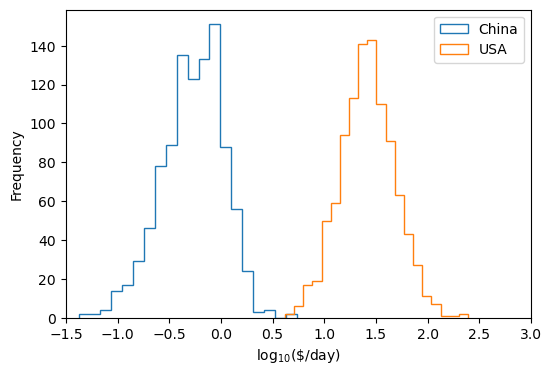

In [11]:
incomes.loc['China', 1965].log10_daily.plot(kind='hist', histtype='step', bins=20, figsize=(6,4), label='China')
incomes.loc['USA', 1965].log10_daily.plot(kind='hist', histtype='step', bins=20, label='USA')
plt.axis(xmin=-1.5, xmax=3)
plt.xlabel(r'$\mathrm{log}_{10} (\$ / \mathrm{day})$'); plt.legend()

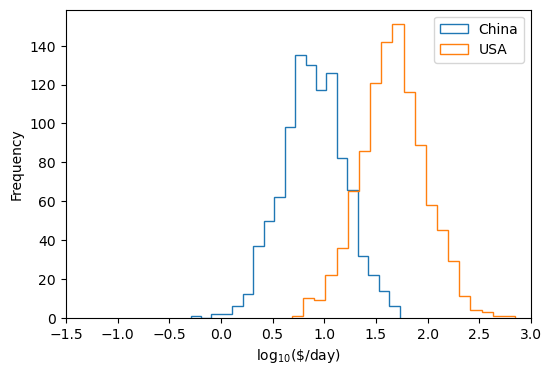

In [12]:
incomes.loc['China', 2015].log10_daily.plot(kind='hist', histtype='step', bins=20, figsize=(6,4), label='China')
incomes.loc['USA', 2015].log10_daily.plot(kind='hist', histtype='step', bins=20, label='USA')
plt.axis(xmin=-1.5, xmax=3)
plt.xlabel(r'$\mathrm{log}_{10} (\$ / \mathrm{day})$'); plt.legend()

In [13]:
gm = pd.read_csv('gapminder.csv')

In [14]:
data = incomes.loc["China", 2015].log10_daily

In [15]:
gm.query('country == "China" and year == 2015').population

7781    1.400000e+09
Name: population, dtype: float64

In [16]:
weights = gm.query('country == "China" and year == 2015').population.iloc[0] * np.ones_like(data) / len(data)

In [17]:
weights[0]

np.float64(1400000.0)

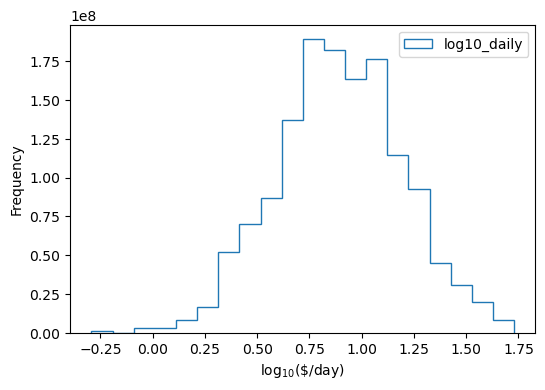

In [18]:
data.plot(kind='hist', histtype='step', bins=20, figsize=(6,4), weights=weights)
plt.xlabel(r'$\mathrm{log}_{10} (\$ / \mathrm{day})$'); plt.legend()

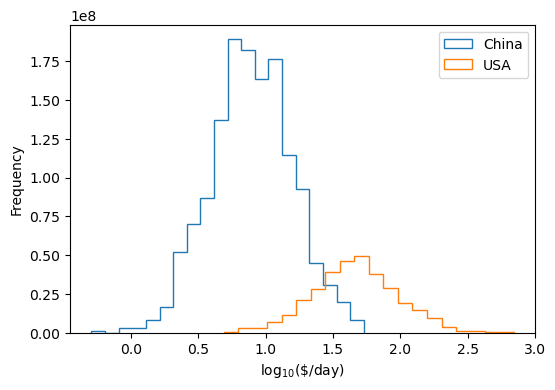

In [19]:
for country in ['China', 'USA']:
    data = incomes.loc[country, 2015].log10_daily
    
    population = gm.query('country == @country and year == 2015').population.iloc[0]
    weights = population * np.ones_like(data) / len(data)
    
    data.plot(kind='hist', histtype='step', bins=20, figsize=(6,4), weights=weights, label=country)

plt.xlabel(r'$\mathrm{log}_{10} (\$ / \mathrm{day})$'); plt.legend()

In [20]:
import seaborn

# silence pandas warnings about methods that will change in the future
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
data_2015 = incomes.loc[pd.IndexSlice[:,2015], :].reset_index()

<Axes: xlabel='country', ylabel='log10_daily'>

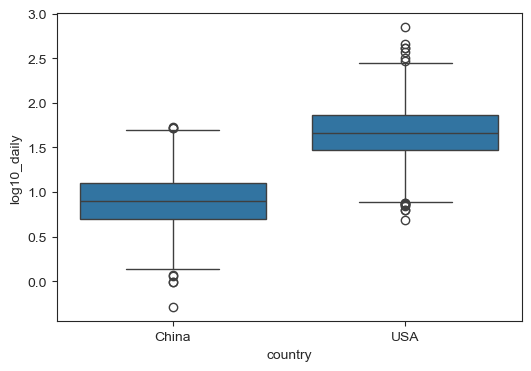

In [22]:
seaborn.set_style(style='ticks') # could be white, dark, whitegrid, darkgrid, ticks  
plt.figure(figsize=(6,4))
seaborn.boxplot(data=data_2015, x='country', y='log10_daily')

<Axes: xlabel='log10_daily', ylabel='Density'>

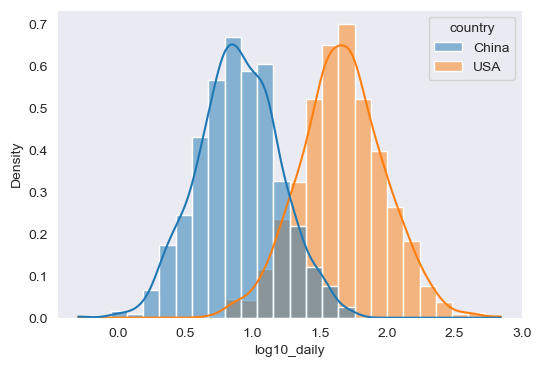

In [23]:
seaborn.set_style(style='dark')
plt.figure(figsize=(6,4))
seaborn.histplot(data=data_2015, x='log10_daily', hue='country', stat='density', kde=True)